In [68]:
  #__________importing all neccessary library___________
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
import numpy as np

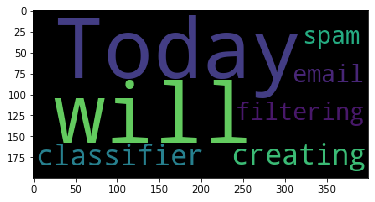

In [2]:
s = 'Today we will be creating a classifier for filtering spam email'
cloud = WordCloud().generate(s)
plt.imshow(cloud)

In [5]:
#____________Loading and Visualizing our data_____________
data = pd.read_csv('spam.csv', usecols=['v1', 'v2'],  encoding = 'latin-1')
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
len(data)

5572

In [42]:
condition1 = data['v1'] == 'ham'
condition2 = data['v1'] == 'spam'
spam = data[condition2]
ham = data[condition1]

In [17]:
spam.head(1)

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [19]:
ham.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [30]:
def combine(array):
    whole_text = ' '
    for sentence in array:
        whole_text = whole_text+sentence
    return whole_text

In [31]:
#__________Visualizing spam textual information________
#pandas->numpy array
spam_array = spam.iloc[:, 1].values
spam_text = combine(spam_array)

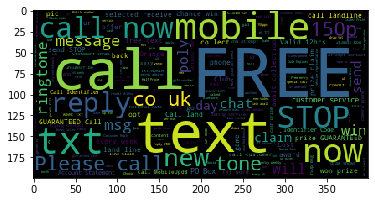

In [38]:
spam_cloud = WordCloud(background_color = 'black', stopwords = STOPWORDS).generate(spam_text)
plt.imshow(spam_cloud)

Text(0.5, 1.0, 'ham cloud')

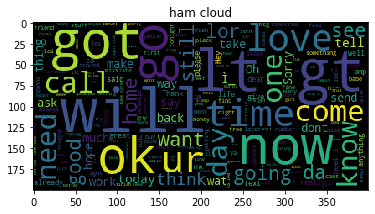

In [47]:
ham_v = ham.iloc[:, 1].values
ham_text = combine(ham_v)
ham_cloud = WordCloud(stopwords=STOPWORDS).generate(ham_text)
plt.imshow(ham_cloud)
plt.title('ham cloud')

In [55]:
#________Converting textual data into vectors_________
from sklearn.feature_extraction.text import CountVectorizer
words = data['v2']
#________initialization ____________
word2vec = CountVectorizer()
word2vec.fit(words.ravel())
vector_words = word2vec.transform(words.ravel())
words_array = vector_words.toarray()

In [63]:
#__________Training the model________________
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(words_array, data['v1'])

In [70]:

def spam_filter():
    while True:
        sentence = input('you: ')
        sent = np.array([[sentence]])
        sent_array = word2vec.transform(sent.ravel()).toarray()
        results = model.predict(sent_array)
        if results[0] == 'ham':
            print('chatbot: Hello')
        else:
            print('chatbo: Youre spam I can\'t answer yoo ')

In [ ]:
spam_filter()

you:  hi


chatbo: Youre spam I can't answer yoo 


you:  hello are you good


chatbo: Youre spam I can't answer yoo 


you:  free wifi and money


chatbot: Hello


you:  you have free award call us now 


chatbo: Youre spam I can't answer yoo 


you:  I just wanted to know youre alright


chatbot: Hello
